#Assignment #4
##Intro to Machine Learning
###Rhichard Koh

# Data Preprocessing

1. Load the adult.data dataset

In [1]:
#1
import pandas as pd
import numpy as np

URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df = pd.read_csv(URL, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [2]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2. The type of job attribute has 1836 missing values, the
occupation attribute has 1843 missing values, and the native
country has 583 missing values.
All missing values are entered as ?.
Fill in all the missing values with the mean value of that attribute if it is
numerical, and the most common occurrence of that value if it is
categorical. 

In [3]:
#2
print('workclass missing values:', (df['workclass'].values == ' ?').sum())
print('occupation missing values:', (df['occupation'].values == ' ?').sum())
print('native-country missing values:', (df['native-country'].values == ' ?').sum())

workclass missing values: 1836
occupation missing values: 1843
native-country missing values: 583


In [4]:
#2
df = df.replace(' ?', np.nan)
df.isna().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [5]:
#2
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']] = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].apply(lambda x: x.fillna(x.mean()))
df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']] = df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']].apply(lambda x: x.fillna(x.mode()[0]))

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

3. There are 24 duplicate records in this dataset, delete them

In [6]:
#3
df.duplicated().sum()

24

In [7]:
#3
df = df.drop_duplicates()
df.duplicated().sum()

0

4. Run df.shape. 

In [8]:
#4
df.shape

(32537, 15)

5. Encode the categorical columns using get_dummies, then run a
df_encoded.shape

In [9]:
#5
df_encoded = pd.get_dummies(df, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"])
df_encoded.shape

(32537, 106)

6. Split the data into 80% training set and 20% testing set, run .shape for
the created X_train, X_test, y_train, y_test.

In [10]:
#6
from sklearn.model_selection import train_test_split

key = {' <=50K': 0, ' >50K': 1}
X = df_encoded.iloc[:,df_encoded.columns != 'income']
y = df_encoded['income'].map(key)
SEED = 4

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=SEED, stratify=y)

In [11]:
#6
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26029, 105) (6508, 105) (26029,) (6508,)


#PCA (40 Marks, 8 Marks per task) 

7. Train a Random Forest classifier on the dataset to predict whether
income exceeds $50K/yr based on census data and time how long it
takes (using %time). 

In [12]:
#7
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

%time rfclf.fit(X_train, y_train)

CPU times: user 9.99 s, sys: 240 ms, total: 10.2 s
Wall time: 18.3 s


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

8. Evaluate the resulting model on the test set using accuracy_score.

In [13]:
#8
from sklearn.metrics import accuracy_score

y_pred = rfclf.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.8385064535955746


9. Next, use PCA to reduce the dataset’s dimensionality, with an explained
variance ratio of 95%. 

In [14]:
#9
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features,y)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca,y, test_size=0.20,random_state=SEED, stratify=y)

10.Train a new Random Forest classifier on the reduced dataset and see
how long it takes. Was the training faster? Or slower?

In [15]:
#10

rfclf_pca = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

%time rfclf_pca.fit(X_train_pca, y_train_pca)

CPU times: user 1min 23s, sys: 166 ms, total: 1min 23s
Wall time: 44.7 s


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

For this dataset and the RandomForestClassifier() PCA did not help to speed up the model, instead it increased the time it took to train.

11. Next, evaluate the classifier from step 10 on the test set using
accuracy_score. How does it compare to the previous classifier?
Did PCA improve accuracy?

In [16]:
#11
y_pred_pca = rfclf_pca.predict(X_test_pca)

print(f'Accuracy Score with PCA: {accuracy_score(y_test_pca, y_pred_pca)}')

Accuracy Score with PCA: 0.8106945298094653


For this dataset and the RandomForestClassifier() PCA did not help to make the model more accurate, instead it decreased its accuracy slightly.

#Neural Network (60 Marks, 4 Marks per task, 15 tasks)

12. Load CIFAR10 small images classification dataset using
tf.keras.datasets.cifar10.load_data()
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10
classes, with 6000 images per class. There are 50000 training images and
10000 test images.

In [20]:
#12
import tensorflow as tf

(x_full, y_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [24]:
print(x_full.shape, y_full.shape)

(50000, 32, 32, 3) (50000, 1)


13. Split the training dataset into 90% training and 10% validation

In [26]:
#13
X_train, X_val, y_train, y_val = train_test_split(x_full,y_full, test_size=0.10,random_state=SEED, stratify=y_full)

In [27]:
#13
print(X_train.shape, y_train.shape)

(45000, 32, 32, 3) (45000, 1)


14. Scale the pixel intensities down to the 0–1 range by dividing them by
255 (this also converts them to floats):

In [28]:
#14
X_train, X_val, X_test = X_train / 255, X_val / 255, X_test / 255

15.Build a DNN using keras.models.Sequential to classify images
using 2 hidden layers of 50 neurons each.
Use relu activation function and he_normal kernel initializer

In [52]:
#15
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(50, activation="relu", name="h1", kernel_initializer="he_normal"),
        layers.Dense(50, activation="relu", name="h2", kernel_initializer="he_normal"),
        layers.Dense(10, activation="softmax", name="output"),
    ]
)

16. Display model.summary(), what is the total number of trainable
parameters?

In [53]:
#16
model.summary()
# Total params: 156,710
# Trainable params: 156,710

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 h1 (Dense)                  (None, 50)                153650    
                                                                 
 h2 (Dense)                  (None, 50)                2550      
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 156,710
Trainable params: 156,710
Non-trainable params: 0
_________________________________________________________________


17. Display the model using keras.utils.plot_model

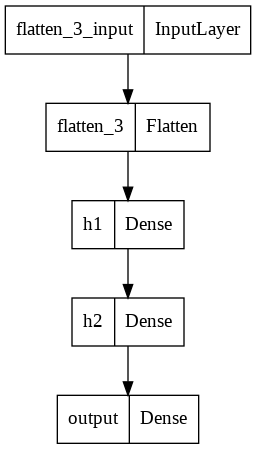

In [54]:
#17
from tensorflow.keras.utils import plot_model

plot_model(model)

18. Display the weights and biases in the first hidden layer.


In [55]:
#18
h1 = model.layers[1]
weights, biases = h1.get_weights()
print("Weights: ", weights)
print("Biases: ", biases)

Weights:  [[-0.01550975 -0.01220965 -0.00719521 ... -0.00688274  0.02115889
  -0.04251421]
 [-0.02231627  0.0431627  -0.02042076 ...  0.01004737 -0.01862872
  -0.03018292]
 [ 0.01645773 -0.00366683  0.01634623 ...  0.01127006  0.0028938
  -0.01559449]
 ...
 [ 0.01217132  0.01176717 -0.01636043 ... -0.01723271 -0.0184187
  -0.01141947]
 [-0.01812699  0.02851396 -0.0176473  ... -0.02215322  0.02399907
   0.0169176 ]
 [ 0.00306555  0.02592325  0.01826535 ... -0.02426892  0.0084552
   0.01014239]]
Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


19. Compile the model using a loss function of
sparse_categorical_crossentropy, set the optimizer as SGD,
and accuracy (sparse_categorical_accuracy) metric.


In [56]:
#19 
model.compile(optimizer='SGD', loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

20. Fit the model using 10 epochs.

In [63]:
#20
tuned_model = model.fit(X_train,y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3760 - sparse_categorical_accuracy: 0.5132 - val_loss: 1.6208 - val_sparse_categorical_accuracy: 0.4300
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3690 - sparse_categorical_accuracy: 0.5152 - val_loss: 1.6271 - val_sparse_categorical_accuracy: 0.4406
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3625 - sparse_categorical_accuracy: 0.5164 - val_loss: 1.5079 - val_sparse_categorical_accuracy: 0.4828
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3543 - sparse_categorical_accuracy: 0.5207 - val_loss: 1.4953 - val_sparse_categorical_accuracy: 0.4698
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3491 - sparse_categorical_accuracy: 0.5208 - val_loss: 1.5969 - val_sparse_categorical_accuracy: 0.4480
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3419 - spar

21. Plot loss, accuracy, val_loss, and val_accuracy.

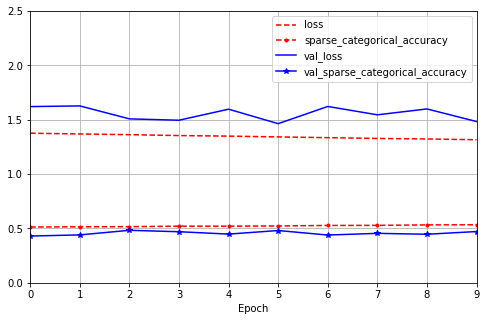

In [64]:
#21
import matplotlib.pyplot as plt

pd.DataFrame(tuned_model.history).plot(figsize=(8, 5),  xlim=[0, 9], ylim=[0, 2.5], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])

plt.legend(loc="best")

plt.show()

22. Fine-tune the following hyperparameters using Keras Tuner: number of
hidden layers, number of neurons, learning rate, and the optimizer

In [71]:
#22
!pip install -q -U keras-tuner
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=2, max_value=10, default=2)
    n_neurons = hp.Int("n_neurons", min_value=50, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

23. Use the code from the attached notebook as a skeleton for your Keras
tuner portion in your notebook.

In [87]:
#23
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=False,
    directory="my_cifar10_models", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_val, y_val))

Trial 10 Complete [00h 01m 13s]
val_accuracy: 0.4691999852657318

Best val_accuracy So Far: 0.47620001435279846
Total elapsed time: 00h 14m 47s


24. What are the best hyperparameters values for the best model? 

In [82]:
#24
top_params = random_search_tuner.get_best_hyperparameters()
top_params[0].values

{'n_hidden': 7,
 'n_neurons': 94,
 'learning_rate': 0.00014023399602325874,
 'optimizer': 'adam'}

25. Plot loss, accuracy, val_loss, and val_accuracy.

In [90]:
#25
best_models = random_search_tuner.get_best_models()
best_model = best_models[0]

tuned_model = best_model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4091 - accuracy: 0.4932 - val_loss: 1.4687 - val_accuracy: 0.4660
Epoch 2/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3908 - accuracy: 0.5002 - val_loss: 1.4531 - val_accuracy: 0.4796
Epoch 3/10
1407/1407 [==============================] - 15s 10ms/step - loss: 1.3672 - accuracy: 0.5103 - val_loss: 1.4609 - val_accuracy: 0.4736
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3476 - accuracy: 0.5175 - val_loss: 1.4465 - val_accuracy: 0.4770
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3323 - accuracy: 0.5222 - val_loss: 1.4727 - val_accuracy: 0.4652
Epoch 6/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3123 - accuracy: 0.5328 - val_loss: 1.4152 - val_accuracy: 0.4928
Epoch 7/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2923 - accuracy: 0.5394 - val_loss: 1.4112 - val_a

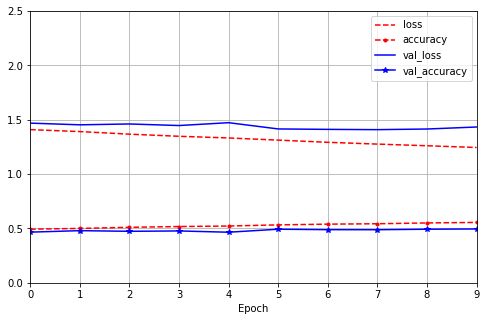

In [91]:
#25
pd.DataFrame(tuned_model.history).plot(figsize=(8, 5),  xlim=[0, 9], ylim=[0, 2.5], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])

plt.legend(loc="best")

plt.show()

26. Display the model using keras.utils.plot_model

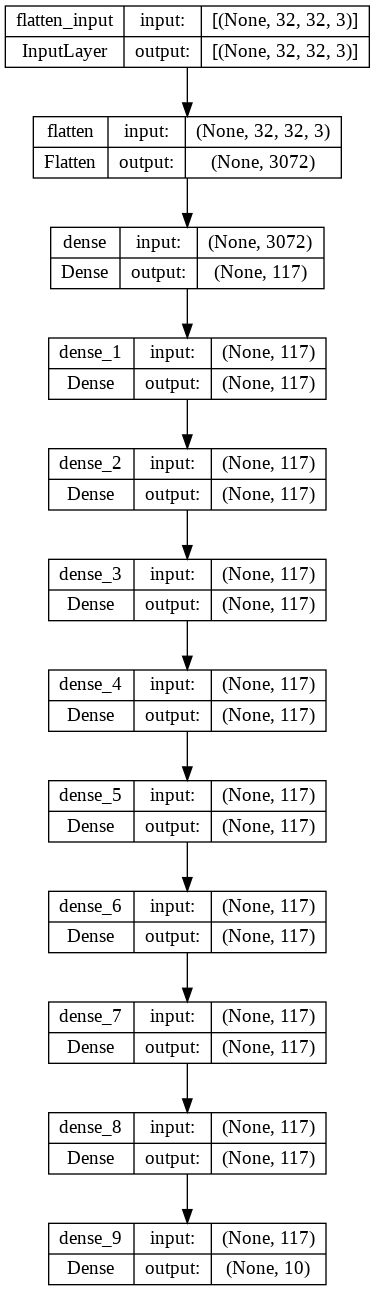

In [94]:
#26
plot_model(best_model, show_shapes=True)